VERİ ANALİZİ


MOVIES DATA SETİ
* actors 
* countries
* genres
* languages
* movies
* movies2actors
* prodcompanies
* ratings


Gerekli Kütüphanelerin Eklenmesi :

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import seaborn as sns

Veri Setlerinin Okunması :

In [72]:
actors = pd.read_csv("movies_dataset/actors.csv")
countries = pd.read_csv("movies_dataset/countries.csv")
genres = pd.read_csv("movies_dataset/genres.csv")
languages =pd.read_csv("movies_dataset/languages.csv")
movies = pd.read_csv("movies_dataset/movies.csv")
movies2actors = pd.read_csv("movies_dataset/movies2actors.csv", sep='\t')
prodcompanies = pd.read_csv("movies_dataset/prodcompanies.csv")
ratings= pd.read_csv("movies_dataset/ratings.csv")

Veri seti hakkında bilgi:

In [3]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98690 entries, 0 to 98689
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   actorid  98690 non-null  int64 
 1   name     98690 non-null  object
 2   sex      98690 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


Veri seti kolonları görüntüleme:

In [4]:
languages.columns

Index(['movieid', 'language'], dtype='object')

Eksik değer kontrolü: 

In [5]:
ratings.isnull().sum()


movieid         0
rank            0
votes           2
distribution    2
dtype: int64

Eksik değerleri silme:

In [6]:
ratings.dropna(subset=["votes"],axis=0, inplace=True)

In [7]:
ratings.dropna(subset=["distribution"],axis=0, inplace=True),

(None,)

In [8]:
ratings.isnull().sum()

movieid         0
rank            0
votes           0
distribution    0
dtype: int64

In [20]:
movies.describe()



,movieid,year
count,3.832000e+03,3832.000000
mean,2.153131e+06,1985.354123
std,2.695891e+05,18.176435
min,1.672052e+06,1898.000000
25%,1.925242e+06,1981.000000
50%,2.173314e+06,1994.000000
75%,2.411781e+06,1997.000000
max,2.593313e+06,2014.000000


In [142]:
countries.columns.tolist()

['FILM_ID', 'ULKE']

Fonksiyon ile veri seti hakkında özet bilgi alma:

In [16]:
def check_df(dataframe, head=5):

    # boyut 
    print("###################################### Shape ######################################")
    print(dataframe.shape)

    # tip
    print("###################################### Types ######################################")
    print(dataframe.dtypes)

    
    print("###################################### Head ######################################")
    print(dataframe.head(head))

    
    print("###################################### Tail ######################################")
    print(dataframe.tail(head))

    print("###################################### MissingValues #############################")
    print(dataframe.isnull().sum())

In [21]:
check_df(ratings)

###################################### Shape ######################################
(3771, 4)
###################################### Types ######################################
movieid           int64
rank            float64
votes           float64
distribution     object
dtype: object
###################################### Head ######################################
   movieid  rank    votes distribution
0  1672052   7.8   8111.0   0000001222
1  1672111   5.3  32183.0   0001221000
2  1672580   4.4   1894.0   0011110000
3  1672716   7.0   1255.0   0000001212
4  1673647   6.5    128.0   0000111211
###################################### Tail ######################################
      movieid  rank    votes distribution
3768  2591814   6.8  56563.0   0000012210
3769  2592334   6.2  36951.0   0000122100
3770  2592963   7.6   2294.0   0000002311
3771  2593112   6.9   1231.0   0000012211
3772  2593313   6.9  12087.0   0000013210
###################################### MissingValues #######

In [22]:
movies.rename(columns={"movieid":"FILM_ID",
                       "title":"FILM_ADI",
                       "year": "YAYIN YILI"},inplace = True)

movies.head()                       

,FILM_ID,FILM_ADI,YAYIN YILI
0,1672052,'Breaker' Morant (1980),1980
1,1672111,'Crocodile' Dundee II (1988),1988
2,1672580,'Til There Was You (1997),1997
3,1672716,"'night, Mother (1986)",1986
4,1672946,...And Justice for All (2014),2014


In [23]:
check_df(countries)

###################################### Shape ######################################
(5007, 2)
###################################### Types ######################################
movieid     int64
country    object
dtype: object
###################################### Head ######################################
   movieid    country
0  1672052  Australia
1  1672111  Australia
2  1672111        USA
3  1672580        USA
4  1672716        USA
###################################### Tail ######################################
      movieid  country
5002  2593112  Germany
5003  2593112  Iceland
5004  2593112    Japan
5005  2593112      USA
5006  2593313    Spain
###################################### MissingValues #############################
movieid    0
country    0
dtype: int64


In [90]:
countries.rename(columns={"movieid":"FILM_ID",
                       "country":"ULKE",},inplace = True)

countries.head()            

,FILM_ID,ULKE
0,1672052,Australia
1,1672111,Australia
2,1672111,USA
3,1672580,USA
4,1672716,USA


In [25]:
check_df(languages)

###################################### Shape ######################################
(4976, 2)
###################################### Types ######################################
movieid      int64
language    object
dtype: object
###################################### Head ######################################
   movieid   language
0  1672052  Afrikaans
1  1672052    English
2  1672111    English
3  1672580    English
4  1672716    English
###################################### Tail ######################################
      movieid   language
4971  2593112    English
4972  2593112     German
4973  2593112  Icelandic
4974  2593112   Japanese
4975  2593313    Spanish
###################################### MissingValues #############################
movieid     0
language    0
dtype: int64


In [118]:
languages.rename(columns={"movieid":"FILM_ID",
                       "language":"DIL",},inplace = True)

languages.head() 

,FILM_ID,DIL
0,1672052,Afrikaans
1,1672052,English
2,1672111,English
3,1672580,English
4,1672716,English


In [27]:
check_df(actors)

###################################### Shape ######################################
(98690, 3)
###################################### Types ######################################
actorid     int64
name       object
sex        object
dtype: object
###################################### Head ######################################
   actorid                  name sex
0        4            $hort, Too   M
1       16    'Bear'Boyd, Steven   M
2       28  'Dead End' Kids, The   M
3      566        Aaby, Kristian   M
4      580                 Aadil   M
###################################### Tail ######################################
       actorid                   name sex
98685  2749162          Ôshima, Akiyo   F
98686  2749168         Ôshima, Yukari   F
98687  2749204            Ôtani, Ikue   F
98688  2749377  Örnólfsdóttir, Álfrún   F
98689  2749386             Öss, Eniko   F
###################################### MissingValues #############################
actorid    0
name       0
sex 

In [126]:
actors.rename(columns={"actorid":"ACTOR_ID",
                       "name":"ACTOR_ADI",
                        "sex": "CINSIYET"},inplace = True)

actors.head() 

,ACTOR_ID,ACTOR_ADI,CINSIYET
0,4,"$hort, Too",M
1,16,"'Bear'Boyd, Steven",M
2,28,"'Dead End' Kids, The",M
3,566,"Aaby, Kristian",M
4,580,Aadil,M


In [29]:
check_df(movies2actors)

###################################### Shape ######################################
(138349, 1)
###################################### Types ######################################
movieid,actorid,as_character,leading    object
dtype: object
###################################### Head ######################################
                movieid,actorid,as_character,leading
0          1672052,88796,"[Court reporter]  <20>",20
1  1672052,88848,"[Col. Ian 'Johnny' Hamilton]  <...
2               1672052,121878,"[Lt. Reed]  <21>",21
3             1672052,134348,"[Large Boer]  <41>",41
4       1672052,198682,"[Lt. Peter Handcock]  <4>",4
###################################### Tail ######################################
               movieid,actorid,as_character,leading
138344  2593313,2439175,"[Camello en Vespa]  <6>",6
138345    2593313,2486754,"[Farmacéutica]  <12>",12
138346        2593313,2521993,"[Periodista]  <9>",9
138347              2593313,2568546,"[Alma]  <4>",4
138348         

In [31]:
check_df(prodcompanies)

###################################### Shape ######################################
(9843, 2)
###################################### Types ######################################
movieid     int64
name       object
dtype: object
###################################### Head ######################################
   movieid                                         name
0  1672052                               7 Network [au]
1  1672052         Australian Film Commission, The [au]
2  1672052                             Pact Productions
3  1672052  South Australian Film Corporation, The [au]
4  1672111                      Paramount Pictures [us]
###################################### Tail ######################################
      movieid                                            name
9838  2593112                                          Icicle
9839  2593112   Pandora Filmproduktion [de] - (co-production)
9840  2593112                  Sunrise [jp] - (co-production)
9841  2593112  Zentrop

In [32]:
prodcompanies.rename(columns={"movieid":"FILM_ID",
                       "name":"YAPIM_FIRMASI",},inplace = True)

prodcompanies.head() 

,FILM_ID,YAPIM_FIRMASI
0,1672052,7 Network [au]
1,1672052,"Australian Film Commission, The [au]"
2,1672052,Pact Productions
3,1672052,"South Australian Film Corporation, The [au]"
4,1672111,Paramount Pictures [us]


In [33]:
check_df(ratings)

###################################### Shape ######################################
(3771, 4)
###################################### Types ######################################
movieid           int64
rank            float64
votes           float64
distribution     object
dtype: object
###################################### Head ######################################
   movieid  rank    votes distribution
0  1672052   7.8   8111.0   0000001222
1  1672111   5.3  32183.0   0001221000
2  1672580   4.4   1894.0   0011110000
3  1672716   7.0   1255.0   0000001212
4  1673647   6.5    128.0   0000111211
###################################### Tail ######################################
      movieid  rank    votes distribution
3768  2591814   6.8  56563.0   0000012210
3769  2592334   6.2  36951.0   0000122100
3770  2592963   7.6   2294.0   0000002311
3771  2593112   6.9   1231.0   0000012211
3772  2593313   6.9  12087.0   0000013210
###################################### MissingValues #######

In [111]:
ratings.rename(columns={"movieid":"FILM_ID",
                       "rank":"PUAN",
                        "votes": "OYLAR",
                        "distribution":"DAĞILIM"},inplace = True)

ratings.head() 

,FILM_ID,PUAN,OYLAR,DAĞILIM
0,1672052,7.8,8111.0,0000001222
1,1672111,5.3,32183.0,0001221000
2,1672580,4.4,1894.0,0011110000
3,1672716,7.0,1255.0,0000001212
4,1673647,6.5,128.0,0000111211


In [77]:
check_df(genres)

###################################### Shape ######################################
(9940, 2)
###################################### Types ######################################
movieid     int64
genre      object
dtype: object
###################################### Head ######################################
   movieid      genre
0  1672052      Drama
1  1672052    History
2  1672052        War
3  1672111     Action
4  1672111  Adventure
###################################### Tail ######################################
      movieid    genre
9935  2593112  Mystery
9936  2593313   Comedy
9937  2593313    Crime
9938  2593313    Drama
9939  2593313  Romance
###################################### MissingValues #############################
movieid    0
genre      0
dtype: int64


In [78]:
genres.rename(columns={"movieid":"FILM_ID",
                       "genre":"TUR"},inplace = True)

genres.head() 

,FILM_ID,TUR
0,1672052,Drama
1,1672052,History
2,1672052,War
3,1672111,Action
4,1672111,Adventure


Dillerin Filmler Arasındaki Dağılımı

In [35]:
languages["DIL"].value_counts().head(10)

English      3440
French        328
Spanish       212
German        162
Italian       159
Russian        95
Japanese       65
Latin          42
Mandarin       40
Cantonese      36
Name: DIL, dtype: int64

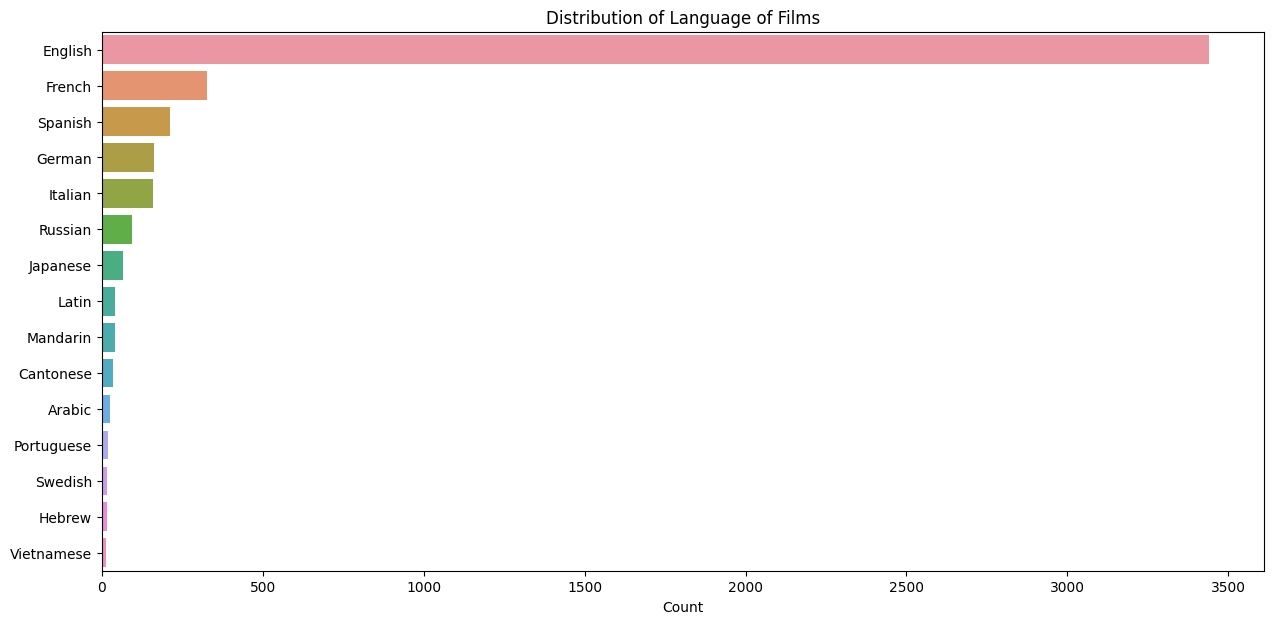

In [36]:

lang =languages.groupby('DIL')['DIL'].count().nlargest(15)
y=lang
x=lang.index

fig=plt.figure(figsize=(15,7))
l=sns.barplot(x=y,y=x);
l.set(title='Distribution of Language of Films', xlabel="Count", ylabel="");

Yıllara Göre Çekilen Film Sayısı

Text(0.5, 1.0, 'Yıllara Göre Çekilen Film Sayısı')

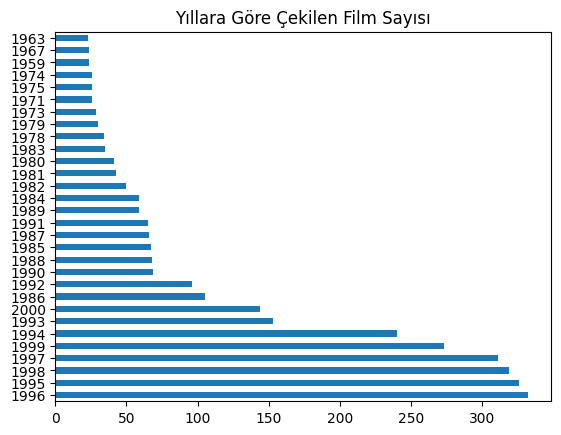

In [54]:
movies["YAYIN YILI"].value_counts().head(30).plot.barh().set_title("Yıllara Göre Çekilen Film Sayısı")


Ülkelere Göre Çekilen Film Sayısı

Text(0.5, 1.0, 'Ülkelere Göre Çekilen Film Sayıları')

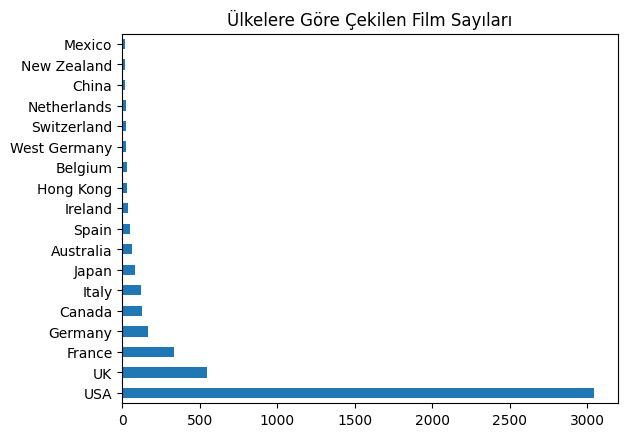

In [58]:
 
countries["ULKE"].value_counts().head(18).plot.barh().set_title("Ülkelere Göre Çekilen Film Sayıları")


Aktörler Kaç Filmde Oynadı?

In [64]:
actors["ACTOR_ADI"].value_counts().head(9)

DuBois, Diane               2
Deroche, Craig              2
de la Torre, Antonio (I)    2
McKinney, Bill (I)          2
$hort, Too                  1
Öldutúnsskóla, Kór          1
Aalam, Schahla              1
Aalam, Leyla                1
Aadland, Beverly            1
Name: ACTOR_ADI, dtype: int64

Text(0.5, 1.0, 'Aktörler kaç filmde oynadı?')

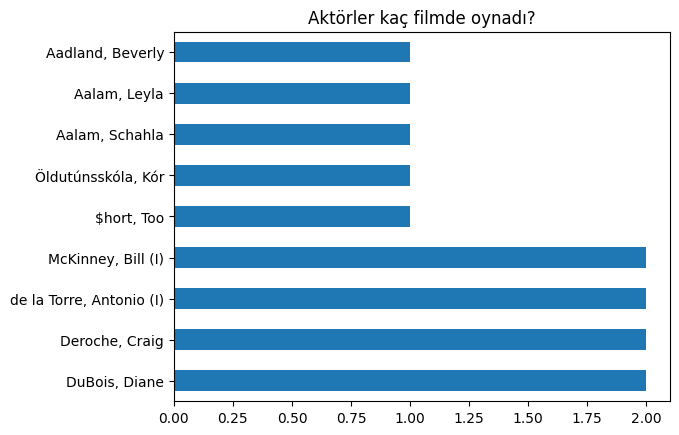

In [65]:
actors["ACTOR_ADI"].value_counts().head(9).plot.barh().set_title("Aktörler kaç filmde oynadı?")

 Ülkelere Göre Hangi Tür Filmler çekildi?

In [92]:
analiz2_df= pd.merge(genres, countries)

In [93]:
analiz2_df.head()

,FILM_ID,TUR,ULKE
0,1672052,Drama,Australia
1,1672052,History,Australia
2,1672052,War,Australia
3,1672111,Action,Australia
4,1672111,Action,USA


In [96]:
analiz2_df.groupby("TUR")["ULKE"].max().sort_values(ascending = False).head(10)

TUR
Comedy              Zaire
Drama               Zaire
Musical             Zaire
Action         Yugoslavia
Adventure      Yugoslavia
War            Yugoslavia
Crime          Yugoslavia
Fantasy        Yugoslavia
Music        West Germany
Thriller     West Germany
Name: ULKE, dtype: object

En çok hangi türlerde filmler çekilmiştir?

In [104]:
genre_filter=genres['TUR'].value_counts().loc[lambda x: x>300].to_frame()
genre_filter

,TUR
Drama,2096
Comedy,1447
Romance,925
Thriller,870
Crime,608
Action,539
Adventure,478
Horror,371
Sci-Fi,363
Mystery,328


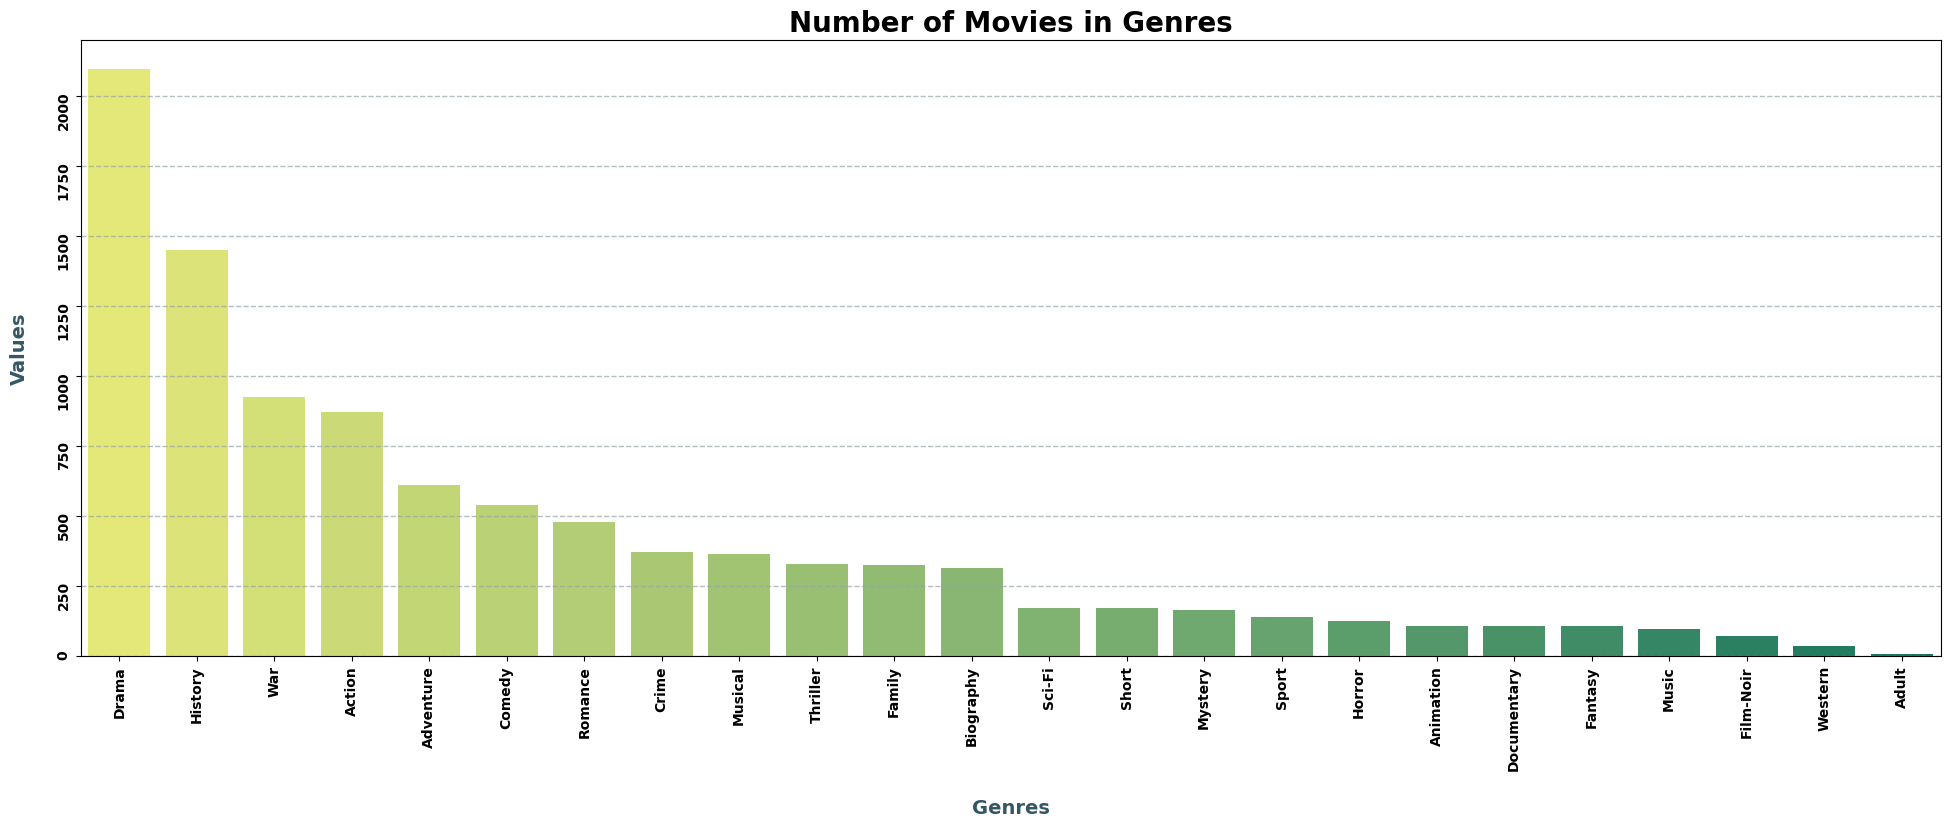

In [105]:
plt.figure(figsize = (24,8))
sns.barplot(x = genres["TUR"].unique(), y= genres["TUR"].value_counts(), palette= "summer_r")
plt.title("Number of Movies in Genres",
          fontsize= 20,
          fontweight = "bold")
plt.grid(color='#95a5a5', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xlabel("Genres", weight="bold", color="#355765", fontsize=14, labelpad = 20)
plt.ylabel("Values", weight="bold", color="#355765", fontsize=14, labelpad=20)
plt.xticks(rotation=90, fontsize=10, weight="bold")
plt.yticks(rotation=90, fontsize=10, weight="bold")
plt.show()

In [116]:
analiz3_df = pd.merge(genres,ratings)
analiz3_df.columns

Index(['FILM_ID', 'TUR', 'PUAN', 'OYLAR', 'DAĞILIM'], dtype='object')

Türlere göre en çok puanı hangi tür filmler aldı?

In [117]:
analiz3_df.groupby("TUR")["PUAN"].max().sort_values(ascending = False).head(10)

TUR
Crime        9.3
Drama        9.3
Western      9.0
Adventure    9.0
Thriller     9.0
War          8.9
History      8.9
Biography    8.9
Action       8.8
Fantasy      8.8
Name: PUAN, dtype: float64

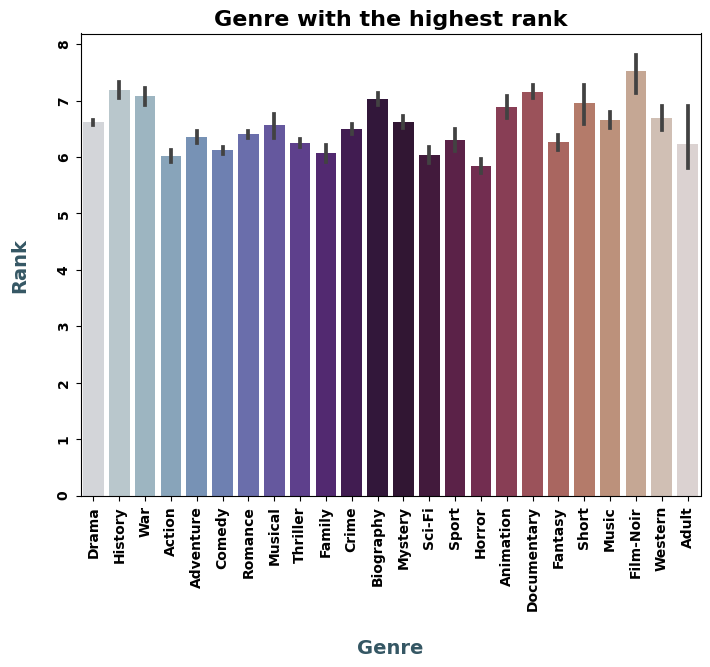

In [94]:
plt.figure(figsize=(8,6))
sns.barplot(x = "genre", y = "rank", data=analiz3_df.reset_index(), palette="twilight")
plt.title("Genre with the highest rank", weight="bold",fontsize=16)
plt.xlabel("Genre", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Rank", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(rotation=90, fontsize=10, weight="bold")
plt.yticks(rotation=90, fontsize=10, weight="bold")
plt.show()

In [119]:
analiz5_df = pd.merge(genres,languages)

In [121]:
analiz5_df.groupby("DIL")["TUR"].value_counts().sort_values(ascending=False)

DIL         TUR     
English     Drama       1840
            Comedy      1340
            Romance      844
            Thriller     828
            Crime        570
                        ... 
Inuktitut   Sci-Fi         1
            Crime          1
Indonesian  War            1
            Romance        1
Zulu        Thriller       1
Name: TUR, Length: 796, dtype: int64

Film Sayısına Göre Yapım Firmaları 

In [124]:
production= prodcompanies.groupby(by='name')["name"].count().sort_values(ascending=False).head(5)
pd.DataFrame(production)

,name
name,
Paramount Pictures [us],116
Universal Pictures [us],106
Warner Bros. [us],100
Columbia Pictures Corporation [us],92
Twentieth Century Fox Film Corporation [us],86


<AxesSubplot: >

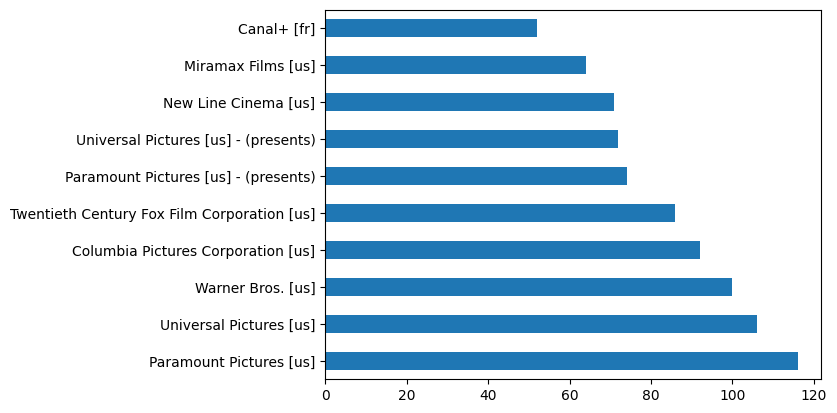

In [141]:
prodcompanies["name"].value_counts().head(10).plot.barh()